Contorno Area 1:5.0
Contorno Perimetro 1:8.828427076339722
Contorno Area 2:21.0
Contorno Perimetro 2:20.0
Contorno Area 3:0.5
Contorno Perimetro 3:3.414213538169861
Contorno Area 4:0.5
Contorno Perimetro 4:3.414213538169861
Contorno Area 5:12.0
Contorno Perimetro 5:21.313708305358887
Contorno Area 6:0.0
Contorno Perimetro 6:0.0
Contorno Area 7:2.5
Contorno Perimetro 7:8.242640614509583
Contorno Area 8:0.0
Contorno Perimetro 8:0.0
Contorno Area 9:122.5
Contorno Perimetro 9:97.84061968326569
Contorno Area 10:0.0
Contorno Perimetro 10:0.0
Contorno Area 11:1.5
Contorno Perimetro 11:5.414213538169861
Contorno Area 12:0.0
Contorno Perimetro 12:0.0
Contorno Area 13:0.0
Contorno Perimetro 13:0.0
Contorno Area 14:0.0
Contorno Perimetro 14:2.0
Contorno Area 15:0.0
Contorno Perimetro 15:4.0
Contorno Area 16:14.5
Contorno Perimetro 16:23.071067690849304
Contorno Area 17:0.0
Contorno Perimetro 17:2.0
Contorno Area 18:1.5
Contorno Perimetro 18:5.414213538169861
Contorno Area 19:0.0
Contorno Perimetr

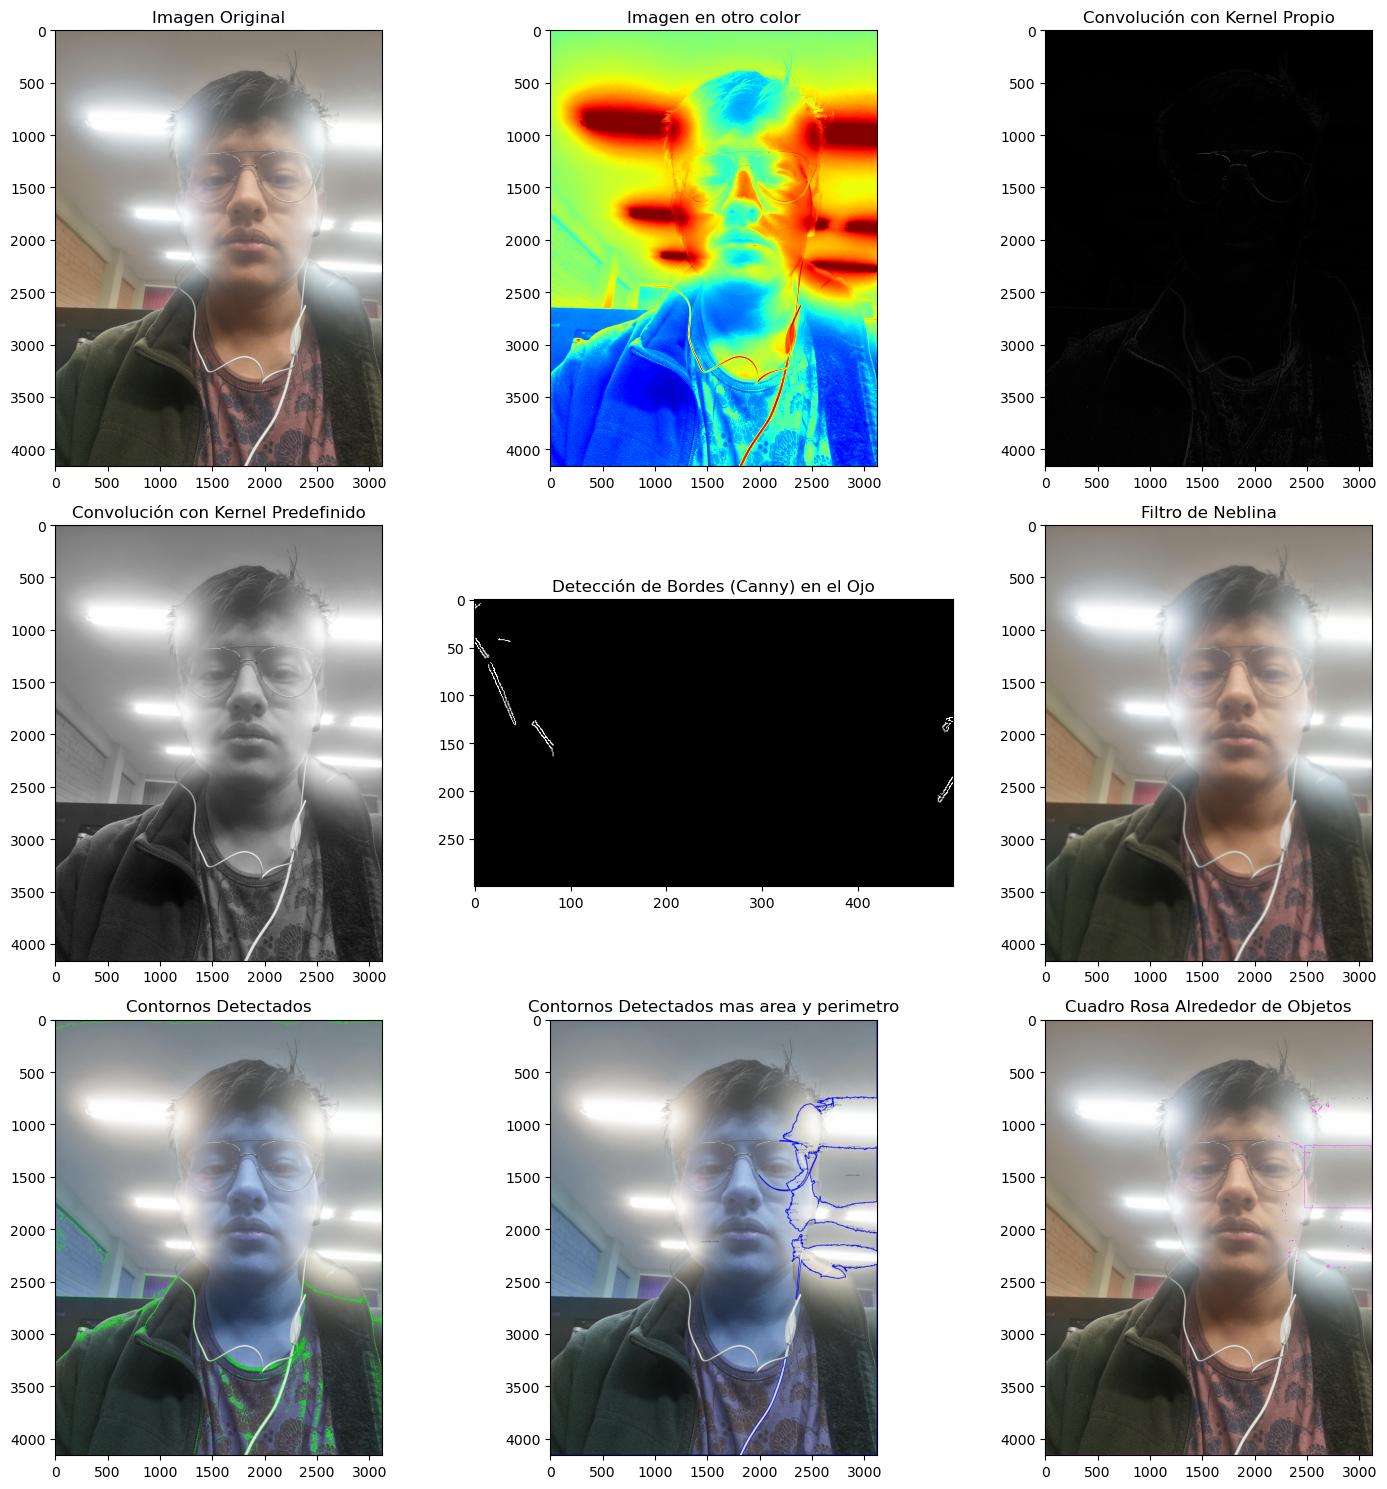

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("..//img/yos.jpg")

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, umbralBinv = cv2.threshold(gris, 127, 255, cv2.THRESH_BINARY_INV)

kernelProp = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

imgKerProp = cv2.filter2D(gris, -1, kernelProp)

kernelPred = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])

imgKerPred = cv2.filter2D(gris, -1, kernelPred)

t_lower = 50  
t_upper = 150  
aperture_size = 5 
imgOjo = img[1300:1600, 1200:1700]
imgcany = cv2.Canny(cv2.cvtColor(imgOjo, cv2.COLOR_BGR2RGB), t_lower, t_upper) 

# Neblina
imagen_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imagen_empañada = cv2.GaussianBlur(imagen_original, (41, 41), 0)
mascara=np.ones_like(imagen_original,dtype=np.float32)
mascara*=0.3
mascara2=np.ones_like(imagen_original,dtype=np.float32)
mascara2*= 0.7
mascara+=mascara2
img_Nublada = (imagen_original * 0.3 + imagen_empañada * 0.7).astype(np.uint8)


_, binaria = cv2.threshold(gris, 127, 255, cv2.THRESH_BINARY)
contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contornos = img.copy()
cv2.drawContours(img_contornos, contornos, -1, (0, 255, 0), 2)
    


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgBini, umbrall = cv2.threshold(gris, 200, 250, cv2.THRESH_BINARY_INV)
contornos, tipo = cv2.findContours(umbrall, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
i = 0


for contorno in contornos:
    contar = contorno
    momento = cv2.moments(contar)

    if momento["m00"] != 0:
        cx = int(momento["m10"] / momento["m00"]) 
        cy = int(momento["m01"] / momento["m00"])  
    else:
        cx, cy = 0, 0
    i=i+1
    area = cv2.contourArea(contar)
    print(f"Contorno Area {i}:" + str(area))
    perimetro = cv2.arcLength(contar, True)
    print(f"Contorno Perimetro {i}:" + str(perimetro))

    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.5
    position = (cx, cy)
    fontColor = (0, 0, 0)

    cv2.putText(
        img_rgb, f"A:" + str(int(area)) + f" P:" + str(int(perimetro)), position, font, fontScale, fontColor
    )
    
    cv2.circle(img_rgb, (cx, cy), 2, (0, 255, 0), -1)

    cv2.drawContours(img_rgb, [contar], -1, (255,0,0), 6)



img_cuadro_rosa = img.copy()
color_rosa = (255, 0, 255)  

for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    cv2.rectangle(img_cuadro_rosa, (x, y), (x + w, y + h), color_rosa, 2)


plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(3, 3, 2)
plt.title('Imagen en otro color')
plt.imshow(gris, cmap='jet')

plt.subplot(3, 3, 3)
plt.title('Convolución con Kernel Propio')
plt.imshow(imgKerProp, cmap='gray')

plt.subplot(3, 3, 4)
plt.title('Convolución con Kernel Predefinido')
plt.imshow(imgKerPred, cmap='gray')

plt.subplot(3, 3, 5)
plt.title('Detección de Bordes (Canny) en el Ojo')
plt.imshow(imgcany, cmap="gray")

plt.subplot(3, 3, 6)
plt.title('Filtro de Neblina')
plt.imshow(img_Nublada)

plt.subplot(3, 3, 7)
plt.title('Contornos Detectados')
plt.imshow(img_contornos)

plt.subplot(3, 3, 8)
plt.title('Contornos Detectados mas area y perimetro')
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

plt.subplot(3, 3, 9)
plt.title('Cuadro Rosa Alrededor de Objetos')
plt.imshow(cv2.cvtColor(img_cuadro_rosa, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


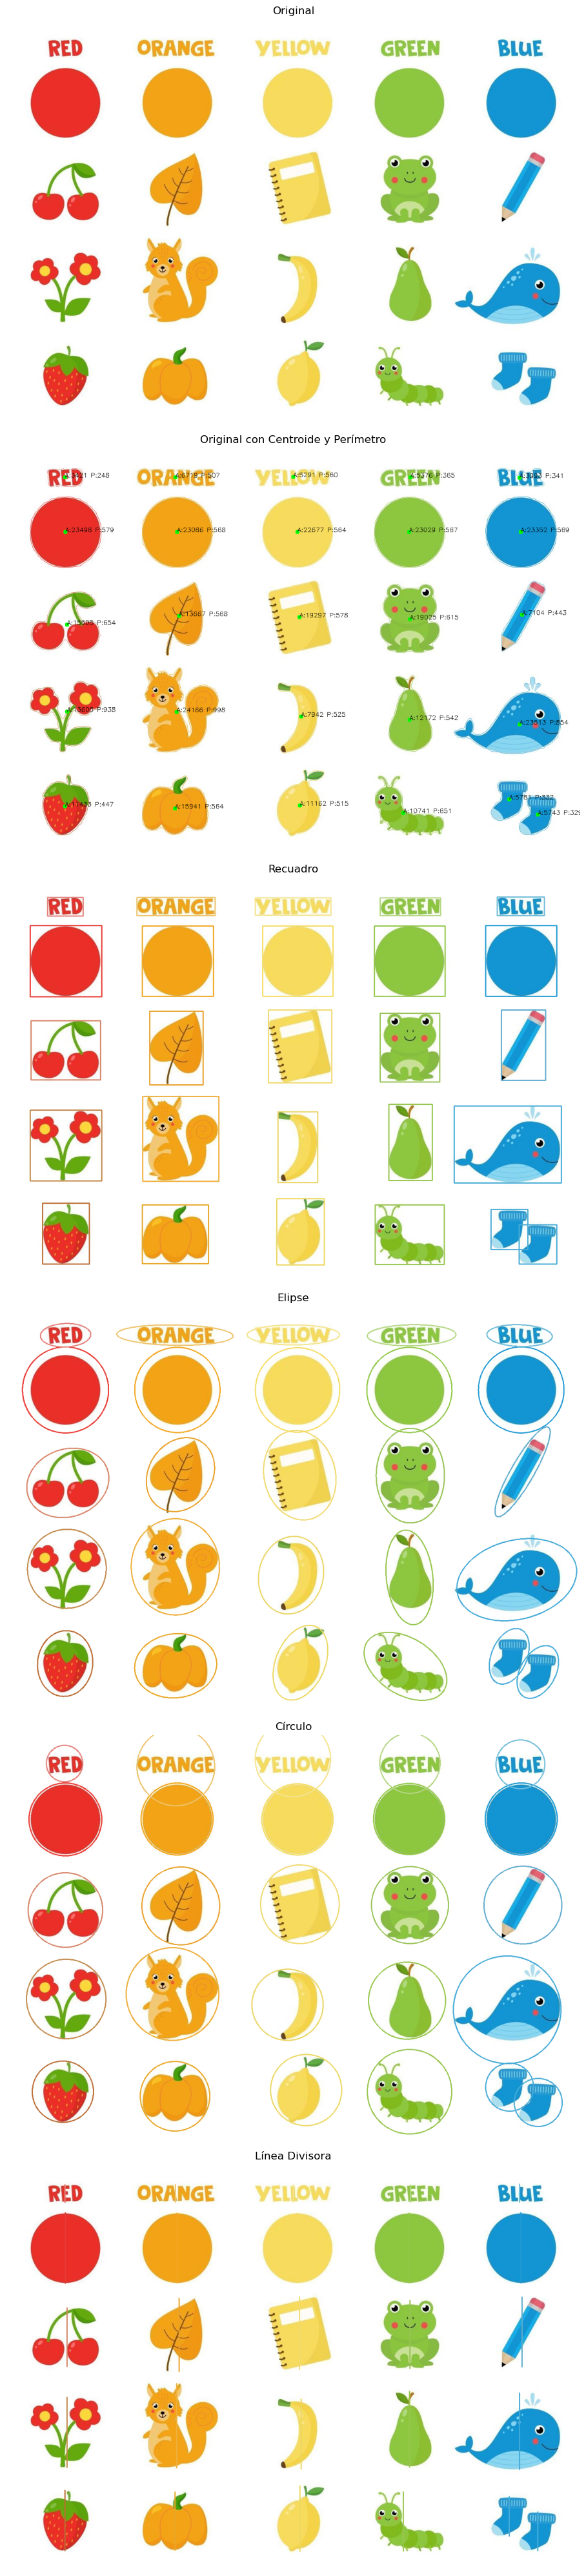

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('..//img/colores.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, umbrall = cv2.threshold(gris, 200, 250, cv2.THRESH_TRIANGLE + cv2.THRESH_BINARY_INV)
umbrall = cv2.medianBlur(umbrall, 9)
contornos, _ = cv2.findContours(umbrall, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_original = img_rgb.copy()
img_rect = img_rgb.copy()
img_ellipse = img_rgb.copy()
img_circle = img_rgb.copy()
img_divider = img_rgb.copy()

def obtener_color_promedio(img, contorno):
    mask = np.zeros_like(img[:, :, 0])
    cv2.drawContours(mask, [contorno], -1, 255, -1)
    mean_color = cv2.mean(img, mask=mask)
    return (int(mean_color[0]), int(mean_color[1]), int(mean_color[2]))

for i, contorno in enumerate(contornos):
    momento = cv2.moments(contorno)
    if momento["m00"] != 0:
        cx = int(momento["m10"] / momento["m00"])
        cy = int(momento["m01"] / momento["m00"])
    else:
        cx, cy = 0, 0
    
    area = cv2.contourArea(contorno)
    perimetro = cv2.arcLength(contorno, True)
    
    color_promedio = obtener_color_promedio(img_rgb, contorno)
    
    cv2.circle(img_original, (cx, cy), 5, (0, 255, 0), -1)
    cv2.drawContours(img_original, [contorno], -1, color_promedio, 1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.5
    position = (cx, cy)
    fontColor = (0, 0, 0)
    cv2.putText(img_original, f"A:{int(area)} P:{int(perimetro)}", position, font, fontScale, fontColor)
    
    x, y, w, h = cv2.boundingRect(contorno)
    cv2.rectangle(img_rect, (x, y), (x+w, y+h), color_promedio, 2)

    if len(contorno) >= 5: 
        ellipse = cv2.fitEllipse(contorno)
        ellipse = (ellipse[0], (ellipse[1][0] * 1.2, ellipse[1][1] * 1.2), ellipse[2])
        cv2.ellipse(img_ellipse, ellipse, color_promedio, 2)

    (x, y), radius = cv2.minEnclosingCircle(contorno)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(img_circle, center, radius, color_promedio, 2)
    
    top_y = min([point[0][1] for point in contorno])
    bottom_y = max([point[0][1] for point in contorno])
    cv2.line(img_divider, (cx, top_y), (cx, bottom_y), color_promedio, 2)

plt.figure(figsize=(20, 40))

plt.subplot(6, 1, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(6, 1, 2)
plt.title('Original con Centroide y Perímetro')
plt.imshow(img_original)
plt.axis('off')

plt.subplot(6, 1, 3)
plt.title('Recuadro')
plt.imshow(img_rect)
plt.axis('off')

plt.subplot(6, 1, 4)
plt.title('Elipse')
plt.imshow(img_ellipse)
plt.axis('off')

plt.subplot(6, 1, 5)
plt.title('Círculo')
plt.imshow(img_circle)
plt.axis('off')

plt.subplot(6, 1, 6)
plt.title('Línea Divisora')
plt.imshow(img_divider)
plt.axis('off')

plt.tight_layout()
plt.show()
